<a href="https://colab.research.google.com/github/Benerugg/textmining/blob/main/tm_exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EDA Notebook**

### Importing


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import word_tokenize

In [ ]:
# Importing and download nltk resources
import nltk

# Downloading with explicit download path and verification
import os
nltk_data_path = '/root/nltk_data'
os.makedirs(nltk_data_path, exist_ok=True)

print("Downloading NLTK resources...")
nltk.download('punkt', download_dir=nltk_data_path)
nltk.download('stopwords', download_dir=nltk_data_path)
nltk.download('wordnet', download_dir=nltk_data_path)

# Verify downloads
for resource in ['punkt', 'stopwords', 'wordnet']:
    try:
        nltk.data.find(f'tokenizers/{resource}') if resource == 'punkt' else nltk.data.find(f'corpora/{resource}')
        print(f"✓ {resource} successfully downloaded")
    except LookupError:
        print(f"✗ {resource} not found - trying to download again")
        nltk.download(resource, quiet=False, download_dir=nltk_data_path)

# Import NLTK modules
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


✓ punkt successfully downloaded
✓ stopwords successfully downloaded
✗ wordnet not found - trying to download again


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Setting random seed and visualization styles

In [ ]:
#Set random seed and visualization styles
import random
random.seed(42)
np.random.seed(42)

# Set up matplotlib for better visualizations
plt.style.use('ggplot')
sns.set(style='whitegrid')

### Loading of data


In [ ]:
try:
    train_data = pd.read_csv(f'/content/train.csv')
    print("Successfully loaded training data")
except FileNotFoundError:
    print("Training data file not found. Please upload the 'train.csv' file to your Colab environment.")
    from google.colab import files
    uploaded = files.upload()
    train_data = pd.read_csv('train.csv')


Training data file not found. Please upload the 'train.csv' file to your Colab environment.


Saving train.csv to train.csv


##**Start EDA**

### General Info
Missing values

In [ ]:
print("Training Data Shape:", train_data.shape)
train_data.head()

# Check for missing values
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())

# View label distribution
print("\nLabel Distribution:")
label_counts = train_data['label'].value_counts().sort_index()
print(label_counts)

Training Data Shape: (9543, 2)

Missing Values in Training Data:
text     0
label    0
dtype: int64

Label Distribution:
label
0    1442
1    1923
2    6178
Name: count, dtype: int64


Word count


<ipython-input-6-a3aedf9daa4c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=train_data, palette='viridis')


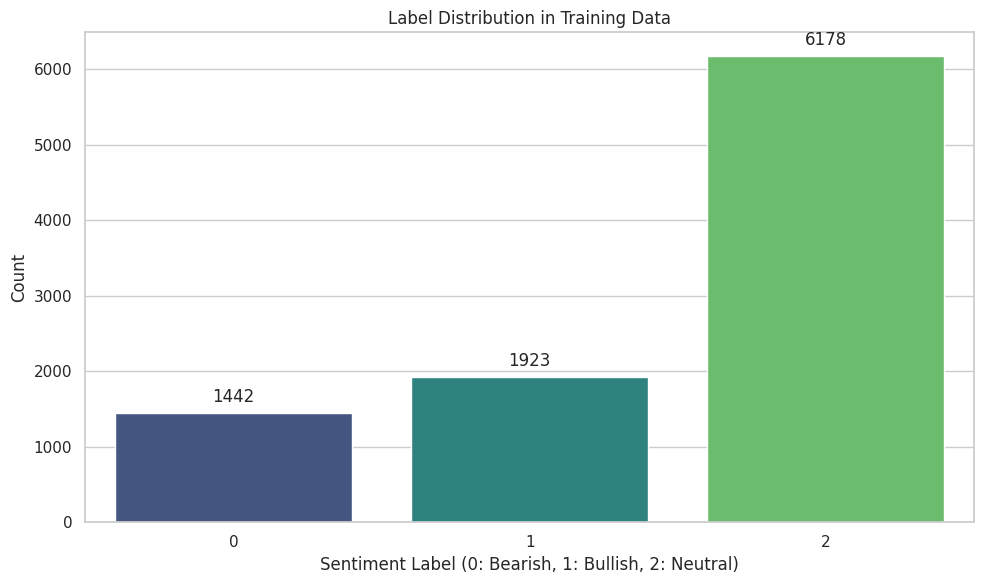

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='label', data=train_data, palette='viridis')
plt.title('Label Distribution in Training Data')
plt.xlabel('Sentiment Label (0: Bearish, 1: Bullish, 2: Neutral)')
plt.ylabel('Count')


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'bottom',
                xytext = (0, 5), textcoords = 'offset points')
plt.tight_layout()
plt.show()

### Length of Tweets

In [ ]:
train_data['text_length'] = train_data['text'].apply(len)
train_data['word_count'] = train_data['text'].apply(lambda x: len(str(x).split()))

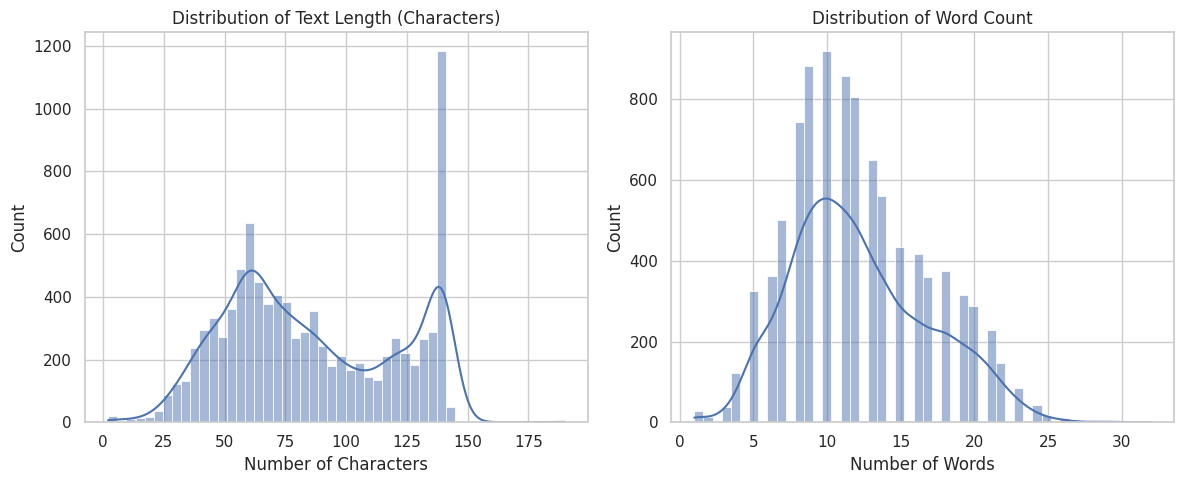

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train_data['text_length'], kde=True, bins=50)
plt.title('Distribution of Text Length (Characters)')
plt.xlabel('Number of Characters')

plt.subplot(1, 2, 2)
sns.histplot(train_data['word_count'], kde=True, bins=50)
plt.title('Distribution of Word Count')
plt.xlabel('Number of Words')
plt.tight_layout()
plt.show()

Boxplots Length of tweets

<ipython-input-9-41665418dc15>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='word_count', data=train_data, palette='viridis')


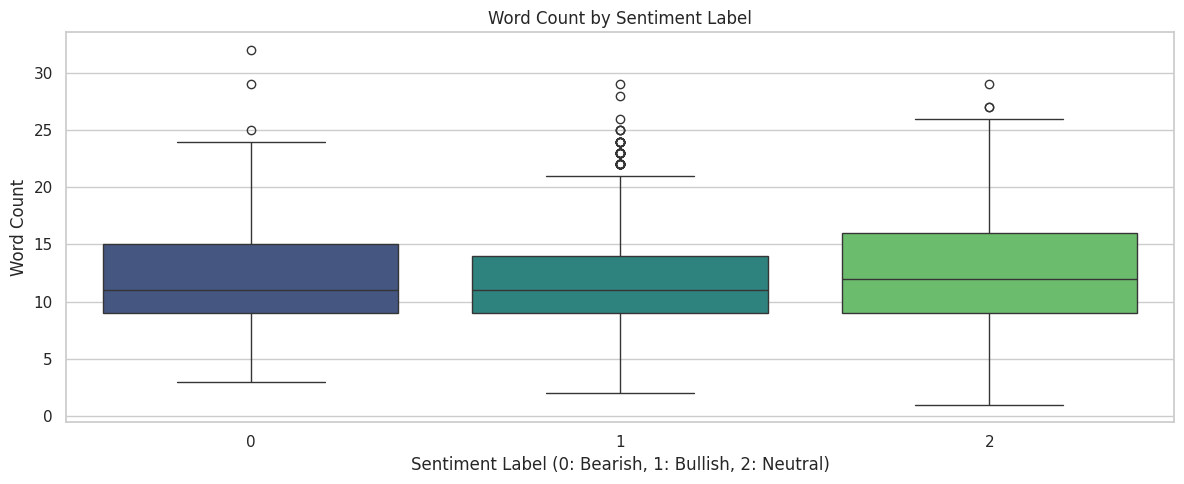

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='label', y='word_count', data=train_data, palette='viridis')
plt.title('Word Count by Sentiment Label')
plt.xlabel('Sentiment Label (0: Bearish, 1: Bullish, 2: Neutral)')
plt.ylabel('Word Count')
plt.tight_layout()
plt.show()


Longest Tweet

In [ ]:
# Longest tweet by word count
longest_by_words = train_data.loc[train_data['word_count'].idxmax()]

print(f"\nLength: {longest_by_words['word_count']} words")


Length: 32 words


### Most common words
Most common words (uni-grams) represented in graph

In [ ]:
def get_most_common_words(text_series, n=20):
    # Join all text
    all_words = ' '.join(text_series).lower()

    # Remove punctuation
    all_words = re.sub(r'[^\w\s]', ' ', all_words)

    # Simple splitting by whitespace
    word_tokens = all_words.split()

    # Get stopwords
    stop_words = set(stopwords.words('english'))

    # Filter stopwords and short words
    filtered_words = [word for word in word_tokens if word not in stop_words and len(word) > 2]

    # Count and return most common
    return Counter(filtered_words).most_common(n)


<ipython-input-13-fe3d938333a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


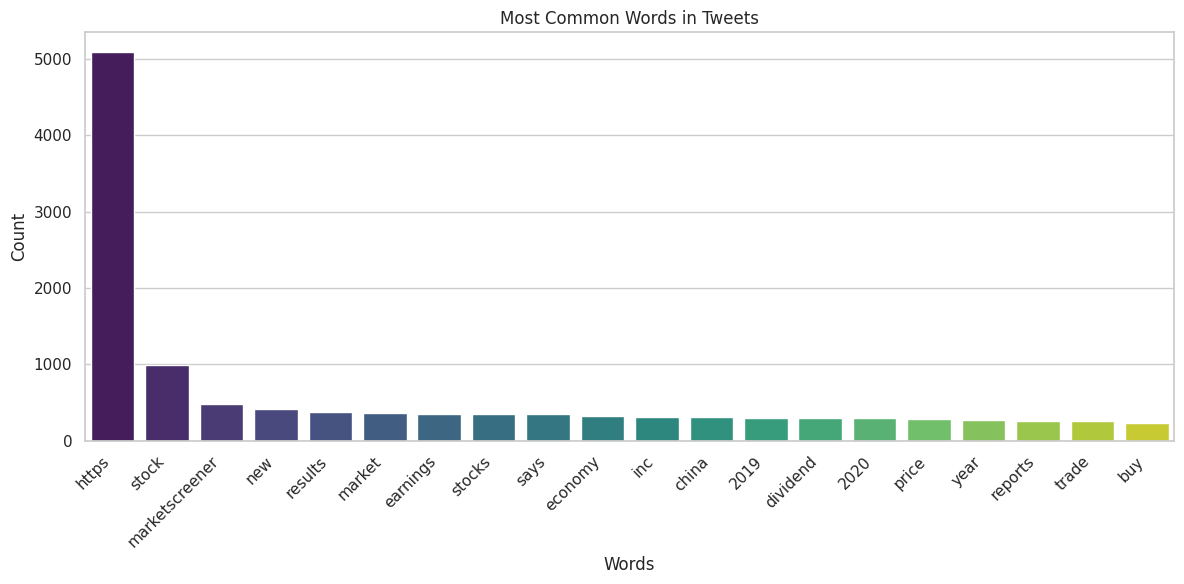

In [ ]:
most_common_words = get_most_common_words(train_data['text'])
words, counts = zip(*most_common_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title('Most Common Words in Tweets')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

WordCloud


In [ ]:
from wordcloud import WordCloud

# Definening word cloud visualization function
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                         max_words=100, contour_width=3, contour_color='steelblue').generate(text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.tight_layout()
    plt.show()

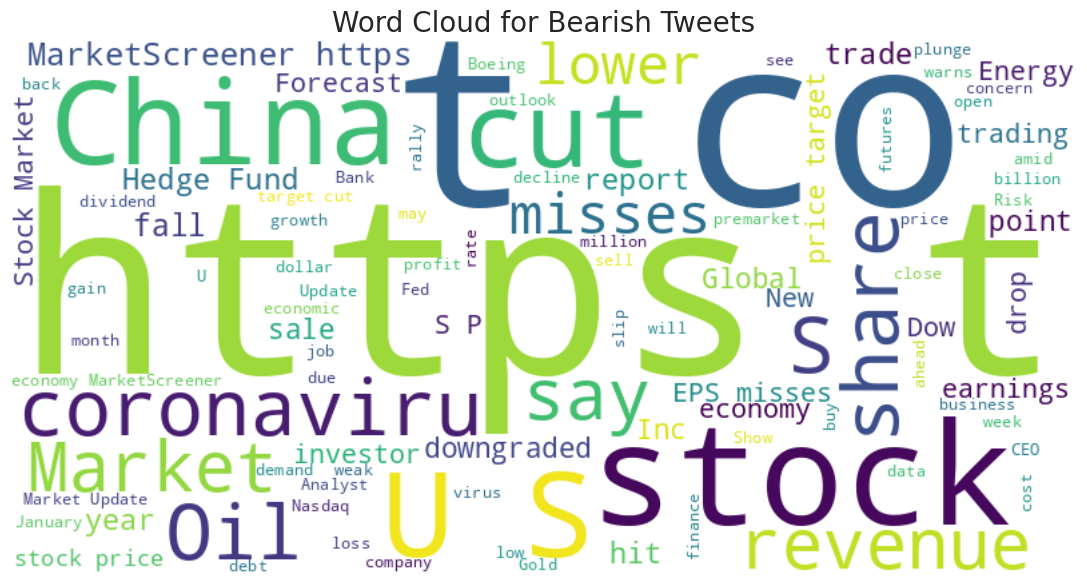

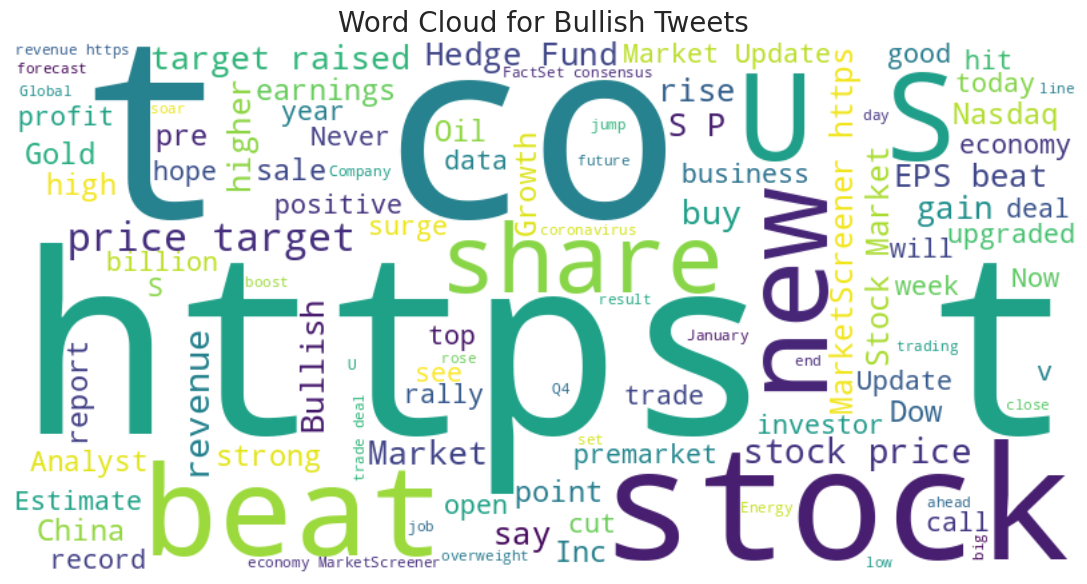

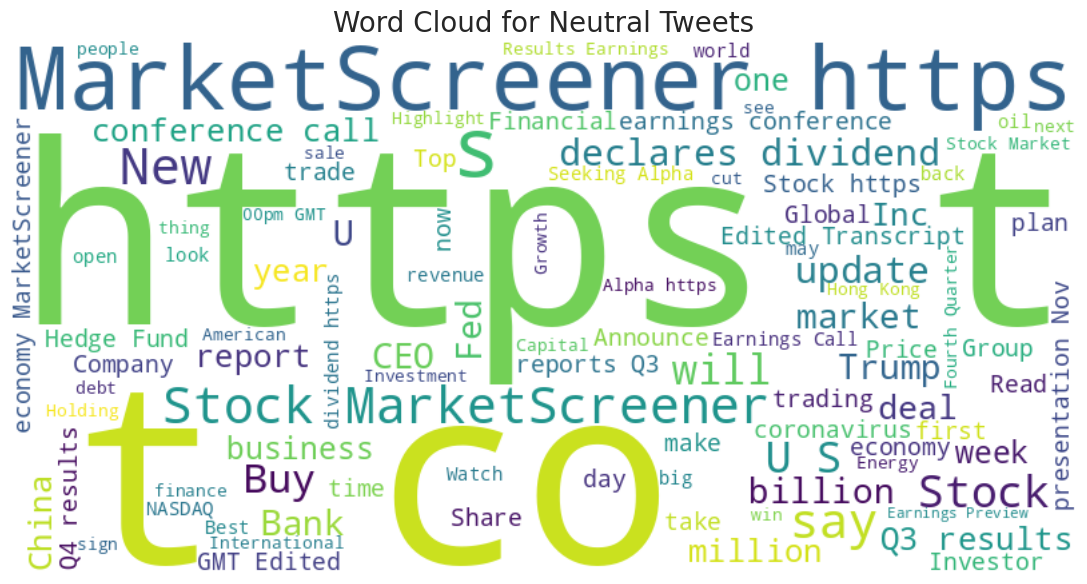

In [ ]:
for label, sentiment in zip([0, 1, 2], ['Bearish', 'Bullish', 'Neutral']):
    text = ' '.join(train_data[train_data['label'] == label]['text'].astype(str))
    create_wordcloud(text, f'Word Cloud for {sentiment} Tweets')

### Uni, Bi & Tri-Grams
Uni-grams

In [ ]:
def get_top_unigrams_with_counts_by_label(data, label_col='label', text_col='text', top_n=10):
    top_unigrams = {}

    for sentiment in sorted(data[label_col].unique()):
        subset = data[data[label_col] == sentiment][text_col]
        vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words='english')
        X = vectorizer.fit_transform(subset)

        sum_words = X.sum(axis=0)
        word_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
        word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)[:top_n]

        top_unigrams[sentiment] = [f"{word} ({count})" for word, count in word_freq]

    df_top = pd.DataFrame(top_unigrams)
    df_top.columns = ['Bearish (0)', 'Bullish (1)', 'Neutral (2)']
    return df_top

# Run it
top_unigrams_with_counts_df = get_top_unigrams_with_counts_by_label(train_data)
display(top_unigrams_with_counts_df)

,Bearish (0),Bullish (1),Neutral (2)
0,https (735),https (842),https (3518)
1,stock (157),stock (258),stock (575)
2,china (85),beats (164),marketscreener (375)
3,misses (85),price (139),results (315)
4,coronavirus (82),target (118),new (288)
5,oil (82),stocks (117),2019 (261)
6,market (73),shares (112),earnings (259)
7,economy (68),market (112),dividend (252)
8,price (65),revenue (107),says (233)
9,stocks (63),new (97),reports (222)


Bi-grams

In [ ]:
def get_top_bigrams_with_counts_by_label(data, label_col='label', text_col='text', top_n=10):
    top_bigrams = {}

    for sentiment in sorted(data[label_col].unique()):
        subset = data[data[label_col] == sentiment][text_col]
        vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
        X = vectorizer.fit_transform(subset)

        sum_words = X.sum(axis=0)
        word_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
        word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)[:top_n]

        top_bigrams[sentiment] = [f"{phrase} ({count})" for phrase, count in word_freq]

    df_top = pd.DataFrame(top_bigrams)
    df_top.columns = ['Bearish (0)', 'Bullish (1)', 'Neutral (2)']
    return df_top

# Run it
top_bigrams_with_counts_df = get_top_bigrams_with_counts_by_label(train_data)
display(top_bigrams_with_counts_df)

,Bearish (0),Bullish (1),Neutral (2)
0,marketscreener https (49),price target (104),marketscreener https (374)
1,misses revenue (38),stock price (77),stock marketscreener (282)
2,hedge funds (36),target raised (74),earnings conference (90)
3,eps misses (33),beats revenue (70),edited transcript (89)
4,stock market (31),eps beats (64),conference presentation (89)
5,price target (30),hedge funds (61),q3 results (88)
6,target cut (29),stock market (56),stock https (81)
7,stock price (29),marketscreener https (55),economy marketscreener (80)
8,economy marketscreener (29),market update (38),reports q3 (79)
9,market update (19),funds bullish (34),nov 19 (68)


Tri-grams

In [ ]:
def get_top_trigrams_with_counts_by_label(data, label_col='label', text_col='text', top_n=10):
    top_trigrams = {}

    for sentiment in sorted(data[label_col].unique()):
        subset = data[data[label_col] == sentiment][text_col]
        vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')
        X = vectorizer.fit_transform(subset)

        sum_words = X.sum(axis=0)
        word_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
        word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)[:top_n]

        top_trigrams[sentiment] = [f"{phrase} ({count})" for phrase, count in word_freq]

    df_top = pd.DataFrame(top_trigrams)
    df_top.columns = ['Bearish (0)', 'Bullish (1)', 'Neutral (2)']
    return df_top

# Run it
top_trigrams_with_counts_df = get_top_trigrams_with_counts_by_label(train_data)
display(top_trigrams_with_counts_df)

,Bearish (0),Bullish (1),Neutral (2)
0,economy marketscreener https (29),stock price target (76),stock marketscreener https (282)
1,stock price target (27),price target raised (73),earnings conference presentation (89)
2,price target cut (26),stock market update (35),economy marketscreener https (80)
3,stock market update (18),hedge funds bullish (34),reports q3 results (77)
4,stock marketscreener https (15),economy marketscreener https (28),seeking alpha https (62)
5,misses revenue https (10),beats revenue https (25),19 00pm gmt (43)
6,eps misses 01 (10),stock marketscreener https (18),reports q4 results (41)
7,hedge funds dumping (10),bofa merrill lynch (14),nov 19 00pm (36)
8,hedge funds selling (10),beats 01 beats (12),q4 2019 earnings (35)
9,roundup economy marketscreener (9),seeking alpha https (11),good stock buy (34)


All grams Combined

In [ ]:
def get_top_combined_ngrams_with_counts_by_label(data, label_col='label', text_col='text', ngram_range=(1,3), top_n=10):
    top_ngrams = {}

    for sentiment in sorted(data[label_col].unique()):
        subset = data[data[label_col] == sentiment][text_col]
        vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
        X = vectorizer.fit_transform(subset)

        sum_words = X.sum(axis=0)
        word_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
        word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)[:top_n]

        top_ngrams[sentiment] = [f"{phrase} ({count})" for phrase, count in word_freq]

    df_top = pd.DataFrame(top_ngrams)
    df_top.columns = ['Bearish (0)', 'Bullish (1)', 'Neutral (2)']
    return df_top

# Run the function
top_combined_ngrams_df = get_top_combined_ngrams_with_counts_by_label(train_data, ngram_range=(1,3), top_n=20)
display(top_combined_ngrams_df)